Context: This notebook was developed the 27-02-2025 for an specific group class work

In [14]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import os


In [15]:
# Importing the dataset 
data_path = r"C:\Users\Usuario\OneDrive - Centro Cultural Colombo Americano\Documentos\ICESI\ANALISIS DE DATOS 1\Sesión 1\Reto Banco W\Historico_hallazgos.xlsx"
df = pd.read_excel(data_path)

In [16]:
df.head()

,Num,ID_modif,Cliente,Analista,Nombre analista,Tipo crédito,Fecha desem,Visita_analista_crédito,Visita_auditor,Actividad,...,Relaciones Laborales,Oficina,zona,Regional,Validación unico,Tipo analisis,Clasificac analisis,Estado,Año,Tipo
0,1,7252440,Hector Julio Pabon Castano,AIZ,Juan Alejandro Trujillo Garcia,Renovacion,2021-06-11 00:00:00,NaN,2022-09-20 00:00:00,don patacon postobon,...,Si,Dosquebradas,12,4,NaN,NaN,NaN,Cancelada,2022,Afecta Estabilidad
1,2,1143936676,Casas Marisol ...,JQQ,Alexander Joaqui Quintero,Renovacion,2021-06-15 00:00:00,2021-06-08 00:00:00,NaN,expendio de comidas preparadas en cafeterias ...,...,Si,Poblado,1,1,NaN,NaN,NaN,Castigo,2022,Afecta Estabilidad
2,3,1193501439,Jose Armando Agudelo Gomez,HZT,Aleatorio,NaN,2022-10-02 00:00:00,2022-02-10 00:00:00,00:00:00,Gallera Trebol,...,NaN,Chaparral,11,4,NaN,NaN,NaN,Cancelada,2022,Afecta Estabilidad
3,4,1088033647,Jennifer Lopez Perez,IOC,Nicolas Suaza Pulgarin,Nuevo,2022-05-03 00:00:00,NaN,2022-08-22 00:00:00,drogueria,...,Si,Dosquebradas,12,4,NaN,NaN,NaN,Modificado,2022,Afecta Estabilidad
4,5,1116271559,Laura Marcela Valdes Zapata,CZL,Martha Herrera Giraldo,Renovación,2022-03-11 00:00:00,2022-03-05 00:00:00,2022-06-07 00:00:00,manualidades artes plasticas,...,NaN,Tulua,3,1,NaN,NaN,NaN,Cancelada,2022,Afecta Estabilidad


In [17]:
df.columns

Index(['Num', 'ID_modif', 'Cliente', 'Analista', 'Nombre analista',
       'Tipo crédito', 'Fecha desem', 'Visita_analista_crédito',
       'Visita_auditor', 'Actividad', 'Monto', 'Cuota', 'Plazo', 'Categoria',
       'Hallazgo', 'Tipo hallazgo', 'Riesgo', 'Calificación cartera',
       'Relaciones Laborales', 'Oficina ', 'zona ', 'Regional',
       'Validación unico', 'Tipo analisis ', 'Clasificac analisis', 'Estado',
       'Año', 'Tipo'],
      dtype='object')

In [18]:
df.isna().sum().sort_values(ascending=False)

Validación unico           3672
Tipo analisis              1522
Clasificac analisis        1522
Estado                     1133
Tipo                       1133
Visita_analista_crédito     800
Relaciones Laborales        496
Tipo crédito                202
Visita_auditor              119
Actividad                    52
Calificación cartera         30
Riesgo                        4
Fecha desem                   3
Hallazgo                      2
Cliente                       1
Tipo hallazgo                 1
ID_modif                      0
Num                           0
Nombre analista               0
Analista                      0
Cuota                         0
Monto                         0
Categoria                     0
Plazo                         0
Oficina                       0
Regional                      0
zona                          0
Año                           0
dtype: int64

In [19]:
df.dtypes.sort_values()

Num                          int64
ID_modif                     int64
Regional                     int64
zona                         int64
Plazo                        int64
Año                          int64
Monto                      float64
Estado                      object
Clasificac analisis         object
Tipo analisis               object
Validación unico            object
Oficina                     object
Relaciones Laborales        object
Calificación cartera        object
Riesgo                      object
Categoria                   object
Hallazgo                    object
Cuota                       object
Actividad                   object
Visita_auditor              object
Visita_analista_crédito     object
Fecha desem                 object
Tipo crédito                object
Nombre analista             object
Analista                    object
Cliente                     object
Tipo hallazgo               object
Tipo                        object
dtype: object

In [20]:
df.Monto.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count      3919.000000
mean       7868.221327
std       12527.212956
min           0.000000
10%        1118.800000
20%        1591.942000
30%        2232.629200
40%        2844.280800
50%        3697.600000
60%        5150.600000
70%        6496.681600
80%        9308.400000
90%       19578.292800
max      130000.000000
Name: Monto, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1120\968150165.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Monto, bins=50, color='red')


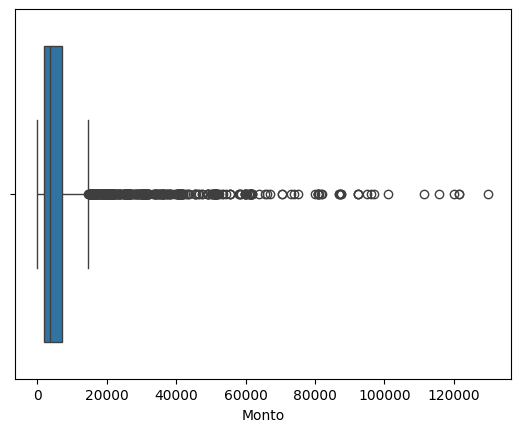

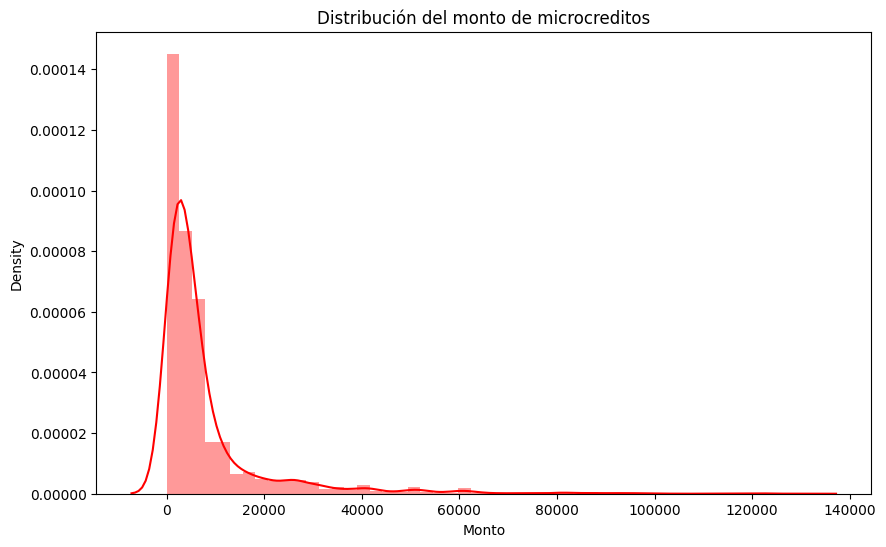

In [21]:
# visualize outliers
sns.boxplot(x=df.Monto)

# visualize distribution

plt.figure(figsize=(10,6))
sns.distplot(df.Monto, bins=50, color='red')
plt.title('Distribución del monto de microcreditos')
plt.show()

# contadores

# df['value'].value_counts()

import warnings
warnings.filterwarnings('ignore')


In [22]:

# Calcular Q1, Q3 y el IQR
Q1 = np.percentile(df.Monto, 25)  # Primer cuartil (25%)
Q3 = np.percentile(df.Monto, 75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Calcular los límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df.Monto[(df.Monto < limite_inferior) | (df.Monto > limite_superior)]
valores_atipicos_superior = df.Monto[(df.Monto > limite_superior)]

In [23]:

print(f'Limite superior para valores atipicos: {limite_superior}\n')
print(f'Numero de microcreditos consideramos como valores atipicos superiores: {valores_atipicos_superior.shape[0]}')
print(f'Porcentaje del total: {round(valores_atipicos_superior.shape[0]/df.shape[0]*100,3)}%')



Limite superior para valores atipicos: 14681.172499999999

Numero de microcreditos consideramos como valores atipicos superiores: 518
Porcentaje del total: 13.218%


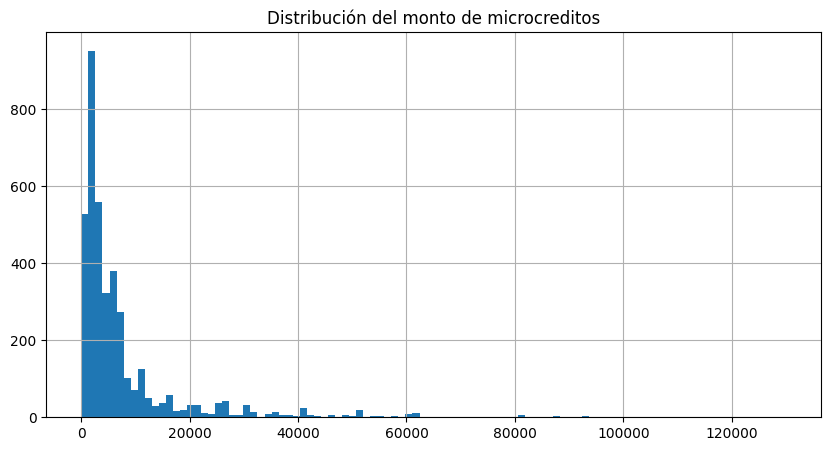

In [24]:
plt.figure(figsize=(10,5))
plt.hist(df.Monto,bins=100)
plt.title("Distribución del monto de microcreditos")
plt.grid()
plt.show()

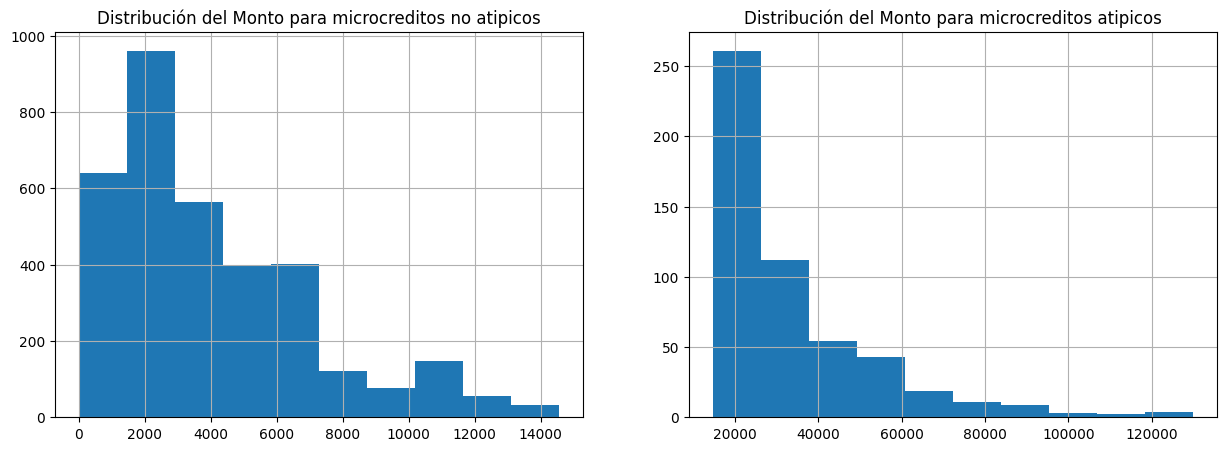

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df[df["Monto"]<limite_superior].Monto)
plt.title("Distribución del Monto para microcreditos no atipicos")
plt.grid()

plt.subplot(1,2,2)
plt.hist(df[df["Monto"]>limite_superior].Monto)
plt.title("Distribución del Monto para microcreditos atipicos")
plt.grid()


plt.show()

In [26]:
df.groupby(by="Año").agg(
    {
        "Monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

Monto                                                     
         #    min      Q 10     Promedio       Q 90         max
Año                                                            
2022  1522  400.0  1079.971  8229.754491  25112.090  130000.000
2023  1264  400.0  1428.916  7089.103865  14140.560  100983.196
2024  1133    0.0   500.000  8251.761481  19851.728  121469.280